## About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Here the assumption is that 50 million customers are male and 50 million customers are female.

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

#### Black Friday is a term for the Friday after Thanksgiving in the United States. It traditionally marks the start of the Christmas shopping season in the United States.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
#Importing the dataset
df=pd.read_csv('Walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
#No. of rows and columns of the dataset
df.shape

(550068, 10)

In [4]:
#No. of null values 
df.isna().sum()/len(df)
#There are no null values in any of the columns.

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [5]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
print(df['Product_Category'].nunique())
# There are 20 unique product categories.
print()
print(df['Product_Category'].unique().tolist())
print()
print(df['Product_Category'].value_counts())

20

[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20, 19]

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64


In [7]:
print(df['Product_ID'].nunique())
print()
# There are 3631 unique product IDs.
print(df['Product_ID'].value_counts()[:10]) #Top 10 product IDs

3631

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
Name: Product_ID, dtype: int64


In [8]:
print(df['Age'].nunique())
print()
# There are 7 unique age categories.
print(df['Age'].unique().tolist())
print()
print(df['Age'].value_counts())

7

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


In [9]:
print(df['Occupation'].nunique())
print()
# There are 20 unique Occupation years.
print(df['Occupation'].unique().tolist())
print()
print(df['Occupation'].value_counts())

21

[10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14, 13, 6]

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


In [10]:
print(df['City_Category'].nunique())
print()
# There are 3 unique City categories.
print(df['City_Category'].unique().tolist())
print()
print(df['City_Category'].value_counts())

3

['A', 'C', 'B']

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


In [11]:
print(df['Stay_In_Current_City_Years'].nunique())
print()
# There are 5 unique Current City Stay Years.
print(df['Stay_In_Current_City_Years'].unique().tolist())
print()
print(df['Stay_In_Current_City_Years'].value_counts())

5

['2', '4+', '3', '1', '0']

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [12]:
print(df['Gender'].nunique())
print()
# There are 2 unique Gender categories.
print(df['Gender'].unique().tolist())
print()
print(df['Gender'].value_counts())

2

['F', 'M']

M    414259
F    135809
Name: Gender, dtype: int64


In [13]:
print(df['Marital_Status'].nunique())
print()
# There are 2 unique Marital Status categories.
print(df['Marital_Status'].unique().tolist())
print()
print(df['Marital_Status'].value_counts())

2

[0, 1]

0    324731
1    225337
Name: Marital_Status, dtype: int64


In [14]:
print(df['User_ID'].nunique())
# There are 5891 unique users.

5891


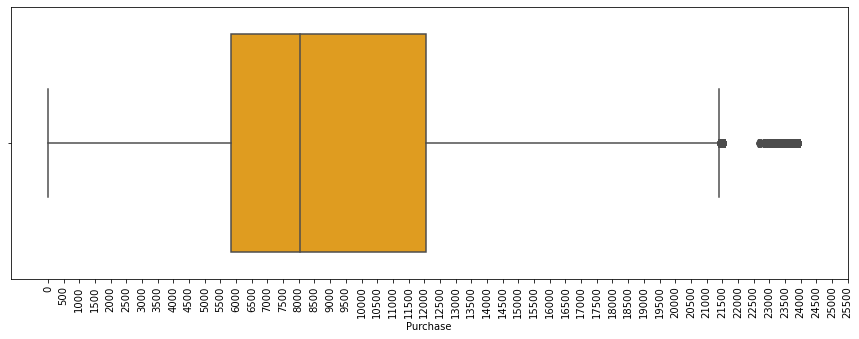

In [15]:
#Using Boxplot on Purchase 
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='Purchase',color='orange')
plt.xticks(np.arange(0,26000,500),rotation=90)
plt.show()
#We see that there are few outliers after which are above 21500.
#The median is around 8000.

In [5]:
#Removing the rows for which outliers are present in the Purchase column
q75,q25 = np.percentile(df['Purchase'],[75,25])
intr_qr = q75-q25
maximum = q75+(1.5*intr_qr)
minimum = q25-(1.5*intr_qr)
df.loc[df['Purchase'] < minimum,'Purchase'] = np.nan
df.loc[df['Purchase'] > maximum,'Purchase'] = np.nan
df.dropna(inplace=True)

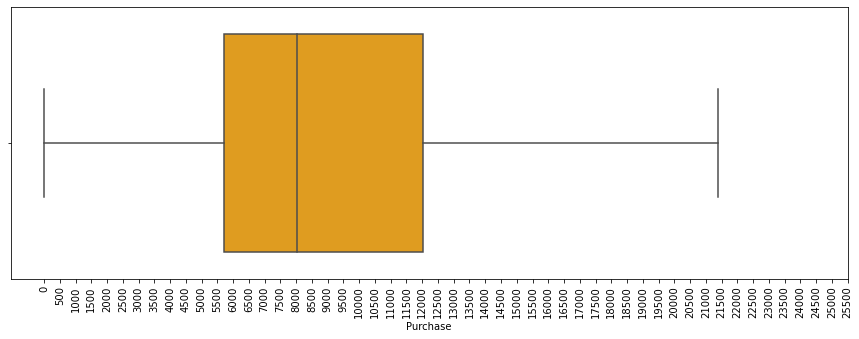

In [6]:
#Using Boxplot on Purchase again. We see that the outliers have been removed.
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='Purchase',color='orange')
plt.xticks(np.arange(0,26000,500),rotation=90)
plt.show()
#We see that there are few outliers after which are above 21500.
#The median is around 8000.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     547391 non-null  int64  
 1   Product_ID                  547391 non-null  object 
 2   Gender                      547391 non-null  object 
 3   Age                         547391 non-null  object 
 4   Occupation                  547391 non-null  int64  
 5   City_Category               547391 non-null  object 
 6   Stay_In_Current_City_Years  547391 non-null  object 
 7   Marital_Status              547391 non-null  int64  
 8   Product_Category            547391 non-null  int64  
 9   Purchase                    547391 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 45.9+ MB


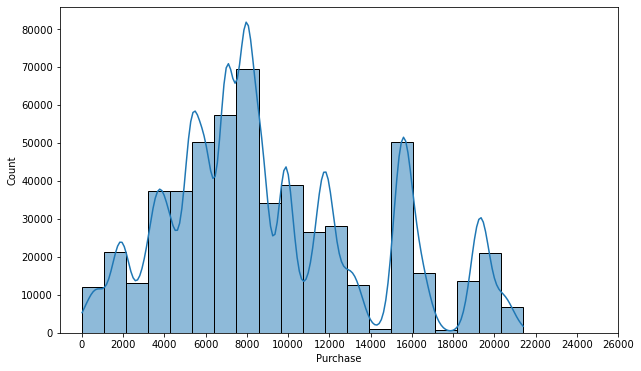

In [19]:
#Distribution Of Purchase
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Purchase',bins=20,kde=True)
plt.xticks(np.arange(0,28000,2000))
plt.show()
#We see that the distribution is right skewed and most of the purchase prices are in the range 4000-13000.
#There are also a few purchases between 15000-16000 and between 19000-21000.
#Since the distribution is right skewed, therefore the mean would be greater than the median.

In [20]:
df.describe()
# Here also we see that the mean Purchase price is greater than the median Purchase price, since it is right skewed.
#The average purchase price is 9195.63 and the median purchase price is 8038.

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.473910e+05,547391.000000,547391.000000,547391.000000,547391.000000
mean,1.003028e+06,8.074627,0.409486,5.378945,9195.627195
std,1.727357e+03,6.521586,0.491739,3.927383,4938.872953
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5721.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,8038.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12019.000000
max,1.006040e+06,20.000000,1.000000,20.000000,21399.000000


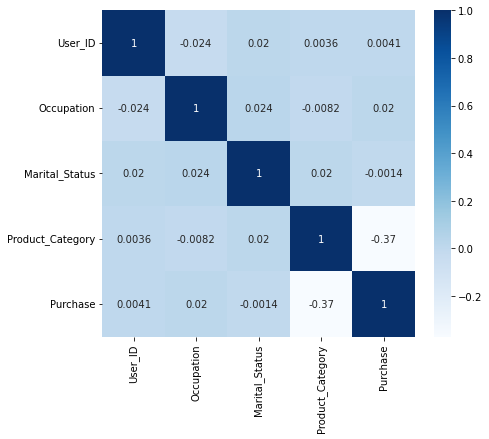

In [21]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()
#From the heatmap, we observe that there isn't a strong relationship between any of the 2 columns.
#The strongest correlation we see is between Product_Category and Purchase.

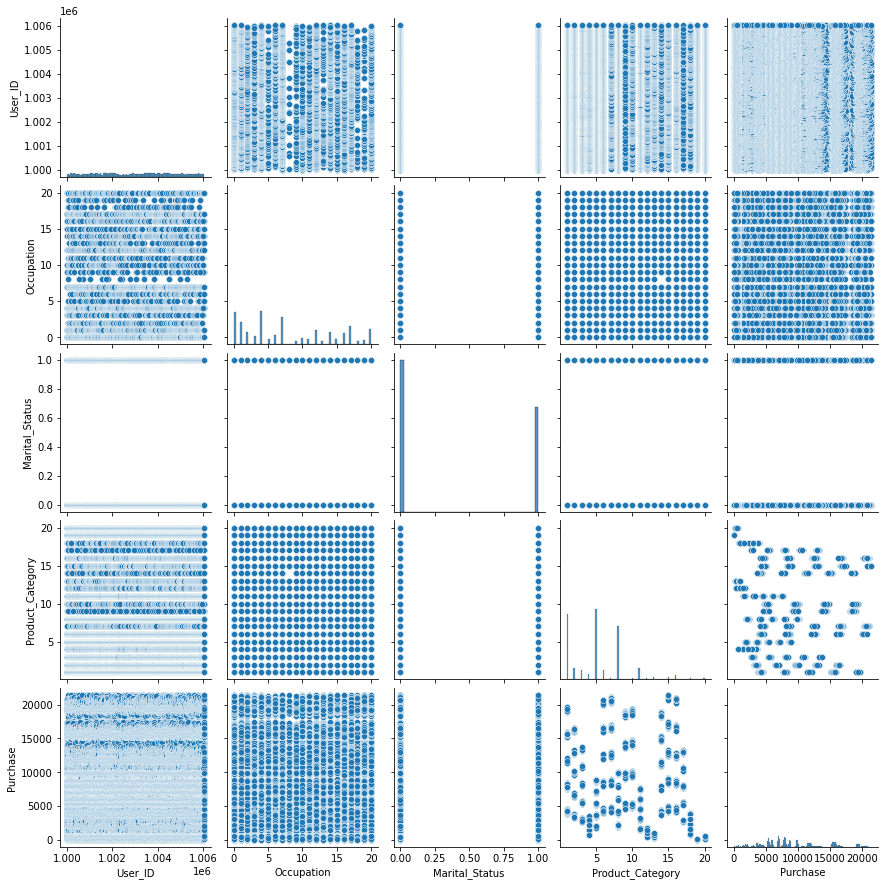

In [22]:
sns.pairplot(df)
plt.show()
#From the pairplot, we get to see that we do not see a relationship between product category and purchase.
#We therefore cannot rely on the correlation  coefficint value of -0.37.

### Question 1 - Purchase price of males and females?  

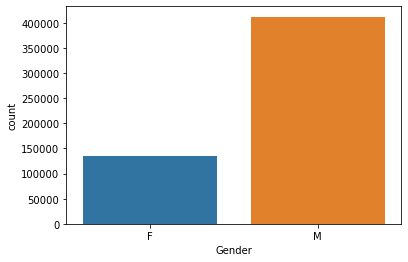

In [23]:
plt.figure()
sns.countplot(data=df,x='Gender')
plt.show()

In [24]:
print(df.groupby(by='Gender').count()['Purchase'])

Gender
F    135220
M    412171
Name: Purchase, dtype: int64


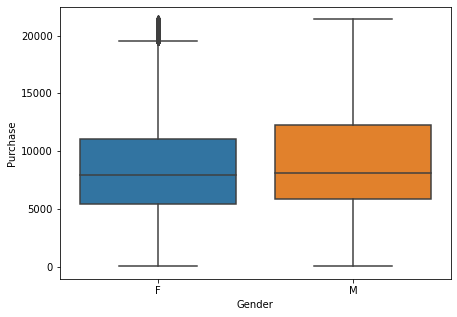

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Gender',y='Purchase')
plt.show()

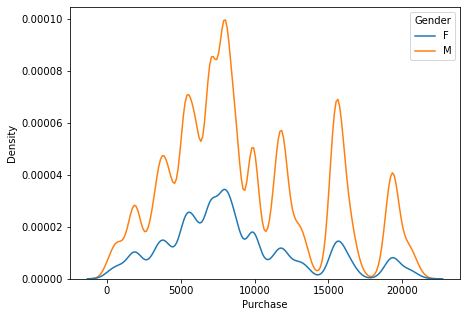

In [26]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df,hue='Gender',x='Purchase')
plt.show()

In [27]:
print(df.groupby(by='Gender').mean()['Purchase'])

Gender
F    8671.049039
M    9367.724355
Name: Purchase, dtype: float64


#### Inference - We see that the average amount spent by males is more than females. In the dataset provided, the no of males making a purchase are 3 times of females making a purcahse.

### Question 2 - Purchase price for each of the age categories?

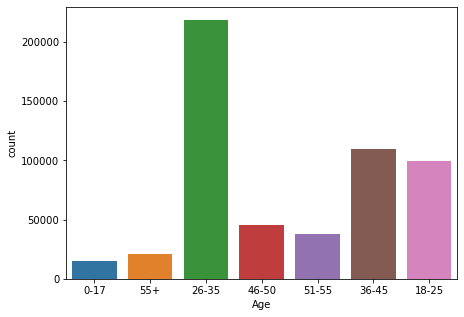

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Age')
plt.show()

In [29]:
print(df.groupby(by='Age').count()['Purchase'])

Age
0-17      15032
18-25     99334
26-35    218661
36-45    109409
46-50     45442
51-55     38191
55+       21322
Name: Purchase, dtype: int64


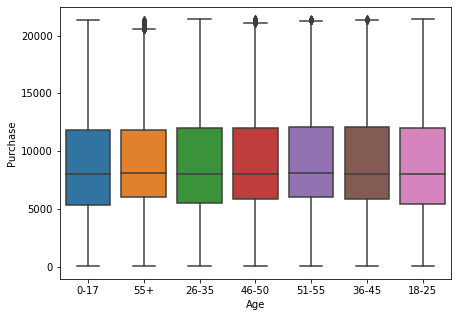

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Age',y='Purchase')
plt.show()

In [31]:
print(df.groupby(by='Age').mean()['Purchase'].sort_values(ascending=False))

Age
51-55    9423.121704
36-45    9254.202214
55+      9216.650220
26-35    9193.469924
46-50    9128.985080
18-25    9124.031731
0-17     8867.447046
Name: Purchase, dtype: float64


#### Inference : We see that the average purchase price of all the age categories is almost same, with the age category 51-55 having the highest purchase price and the age group 0-17 having the lowest average purchase price. Most of the customers are in the age category 18-25, 36-45 and 26-35. 

### Question 3 - Purchase price for each of the marital status categories?

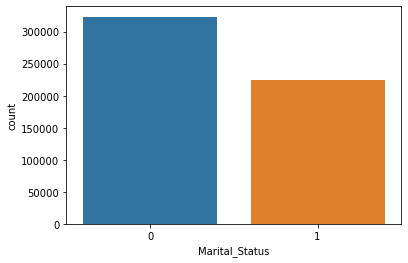

In [32]:
plt.figure()
sns.countplot(data=df,x='Marital_Status')
plt.show()

In [33]:
print(df.groupby(by='Marital_Status').count()['Purchase'])

Marital_Status
0    323242
1    224149
Name: Purchase, dtype: int64


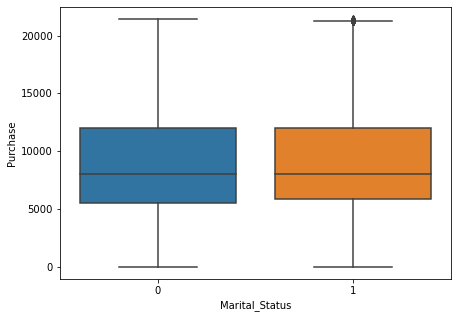

In [34]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Marital_Status',y='Purchase')
plt.show()

In [35]:
print(df.groupby(by='Marital_Status').mean()['Purchase'].sort_values(ascending=False))

Marital_Status
0    9201.581849
1    9187.040076
Name: Purchase, dtype: float64


#### Inference - We see that the average purchase price of both the marital status categories is almost same. The number of unmarried people buying the products is almost 1.5x of that of who are married.

### Question 4 - Average purchase price for each of the city categories ?

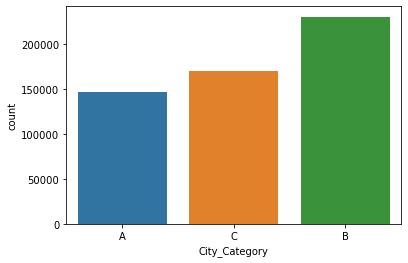

In [36]:
plt.figure()
sns.countplot(data=df,x='City_Category')
plt.show()

In [37]:
print(df.groupby(by='City_Category').count()['Purchase'])

City_Category
A    147036
B    230114
C    170241
Name: Purchase, dtype: int64


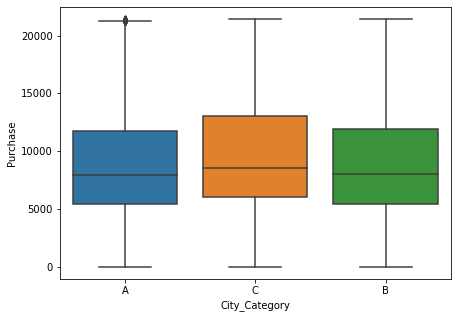

In [38]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='City_Category',y='Purchase')
plt.show()

In [39]:
print(df.groupby(by='City_Category').mean()['Purchase'].sort_values(ascending=False))

City_Category
C    9645.647300
B    9086.502707
A    8845.367393
Name: Purchase, dtype: float64


#### Inference - We observe that the average purchase price is highest in City C and least in city A. The number of people buying from City B is the highest and lowest for city A among all cities.

### Question 5 - Purchase price for each of the stay_in_the_current_year categories ?

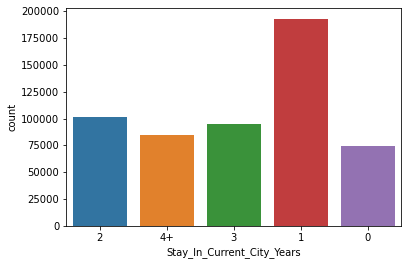

In [40]:
plt.figure()
sns.countplot(data=df,x='Stay_In_Current_City_Years')
plt.show()

In [41]:
print(df.groupby(by='Stay_In_Current_City_Years').count()['Purchase'].sort_values(ascending=False))

Stay_In_Current_City_Years
1     192845
2     101384
3      94804
4+     84322
0      74036
Name: Purchase, dtype: int64


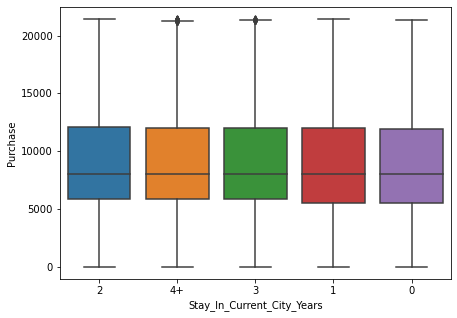

In [42]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Stay_In_Current_City_Years',y='Purchase')
plt.show()

In [43]:
print(df.groupby(by='Stay_In_Current_City_Years').mean()['Purchase'].sort_values(ascending=False))

Stay_In_Current_City_Years
2     9258.292028
3     9215.953451
4+    9208.837895
1     9179.275916
0     9111.331555
Name: Purchase, dtype: float64


#### Inference - We observe that the average purchase price is higher for people whose current city staying years are greater than or equal to 2 years. The number of people who make the most purchases are those that have lived in the current city for 1 year.

### Question 6 - Purchase price for each of the Product categories ?

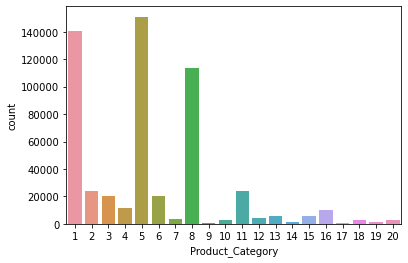

In [44]:
plt.figure()
sns.countplot(data=df,x='Product_Category')
plt.show()

In [45]:
print(df.groupby(by='Product_Category').count()['Purchase'].sort_values(ascending=False))

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      5963
13      5549
12      3947
7       3721
18      3125
10      2850
20      2550
19      1603
14      1523
17       578
9        335
Name: Purchase, dtype: int64


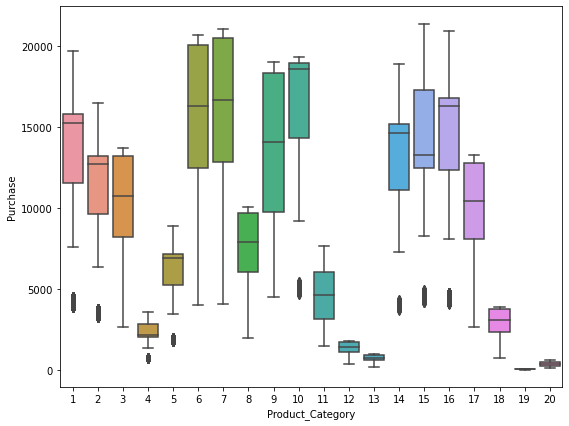

In [46]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,x='Product_Category',y='Purchase')
plt.show()

In [47]:
print(df.groupby(by='Product_Category').mean()['Purchase'].sort_values(ascending=False))

Product_Category
10    16626.385965
7     16365.689600
6     15838.478550
16    14766.037037
15    14412.504109
9     13852.325373
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64


#### Inference - We see that the highest average purchase price is for product category 10, and the least average purchase price is for product category 19. The most sold product categories are 5,1 and 8.

### Question 7 - Purchase price for each of the occupation categories ?

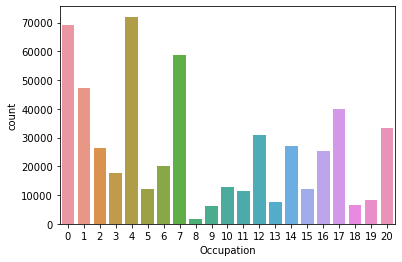

In [48]:
plt.figure()
sns.countplot(data=df,x='Occupation')
plt.show()

In [49]:
print(df.groupby(by='Occupation').count()['Purchase'].sort_values(ascending=False))

Occupation
4     72040
0     69310
7     58875
1     47174
17    39855
20    33355
12    30995
14    27173
2     26435
16    25251
6     20261
3     17568
10    12888
5     12133
15    12086
11    11500
19     8412
13     7667
18     6595
9      6278
8      1540
Name: Purchase, dtype: int64


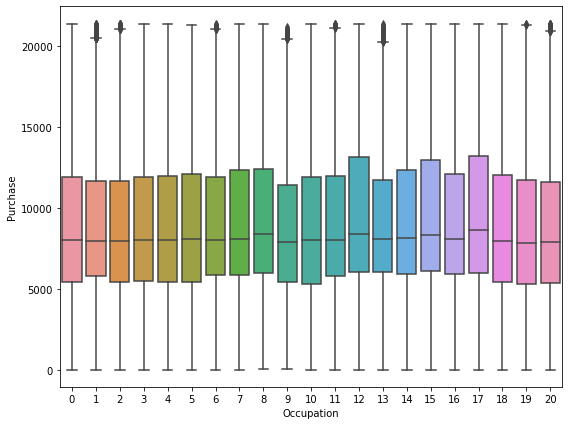

In [50]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,x='Occupation',y='Purchase')
plt.show()

In [51]:
print(df.groupby(by='Occupation').mean()['Purchase'].sort_values(ascending=False))

Occupation
17    9758.679087
12    9717.192386
15    9691.443157
8     9479.513636
14    9431.785228
7     9365.188025
16    9328.979090
5     9283.268854
13    9194.099387
6     9191.133261
4     9161.759189
18    9113.718423
3     9112.929019
11    9108.370957
0     9057.506291
10    8912.886639
1     8876.457053
2     8869.590505
20    8746.967501
19    8627.760818
9     8607.359828
Name: Purchase, dtype: float64


#### Inference - We see that the highest average purchase price is for 17 years of occupation and lowest average purchase price is for 9 years of occupation. People having 4,0 and 7 years of occupation are the most frequent buyers.

### Question 8 - What product categories are mostly bought by each of the gender?

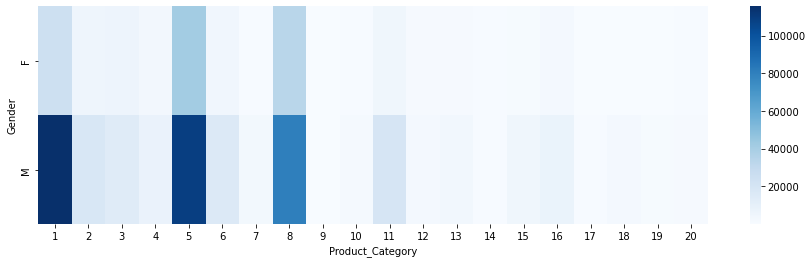

In [52]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.crosstab(index=df['Gender'],columns=df['Product_Category']),cmap='Blues')
plt.show()

In [53]:
pd.crosstab(index=df['Gender'],columns=df['Product_Category'],normalize='index')

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,0.183634,0.041843,0.044417,0.026912,0.310317,0.033715,0.006974,0.248173,0.000414,0.004718,0.035047,0.011330,0.010812,0.004607,0.007358,0.017764,0.000459,0.002825,0.003335,0.005347
M,0.280338,0.044171,0.034469,0.019686,0.264385,0.038593,0.006740,0.194985,0.000677,0.005367,0.047427,0.005859,0.009916,0.002184,0.012053,0.018017,0.001252,0.006655,0.002795,0.004433


#### Inference - We observe that irrespective of the gender, people mostly buy the products 1, 5 and 8.

### Question 9 - What product categories are mostly bought by each of the age categories?

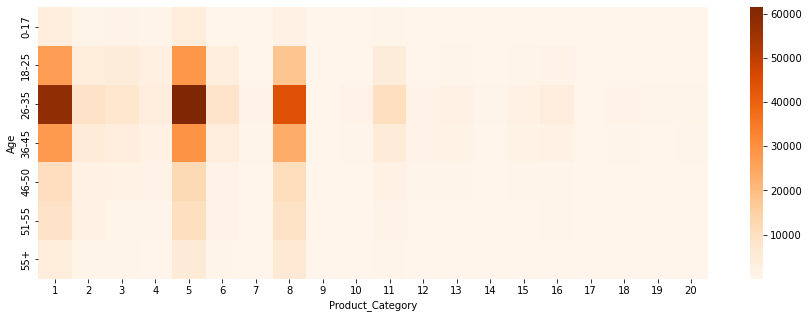

In [54]:
plt.figure(figsize=(15,5))
sns.heatmap(pd.crosstab(index=df['Age'],columns=df['Product_Category']),cmap='Oranges')
plt.show()

In [55]:
pd.crosstab(index=df['Age'],columns=df['Product_Category'],normalize='index')

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,0.238491,0.053552,0.079830,0.050426,0.288052,0.026543,0.003526,0.150213,0.000998,0.003725,0.049228,0.008316,0.007451,0.002594,0.009713,0.015234,0.000399,0.001796,0.003925,0.005987
18-25,0.271428,0.044577,0.047416,0.024795,0.287132,0.037741,0.004842,0.180311,0.000483,0.003584,0.046278,0.004419,0.007611,0.002315,0.009664,0.016087,0.000413,0.003413,0.002768,0.004721
26-35,0.266390,0.040830,0.035041,0.019171,0.281134,0.038804,0.007551,0.202395,0.000563,0.004582,0.045157,0.005012,0.009586,0.002579,0.010345,0.018833,0.000581,0.004765,0.002575,0.004107
36-45,0.252703,0.044896,0.035226,0.021516,0.268506,0.035637,0.007394,0.212926,0.000859,0.006416,0.045270,0.009085,0.011425,0.002852,0.012220,0.017869,0.001234,0.006416,0.002925,0.004625
46-50,0.230492,0.046323,0.030280,0.021786,0.263435,0.035694,0.007196,0.234497,0.000572,0.006668,0.046301,0.011443,0.012125,0.003279,0.012477,0.019343,0.002091,0.007724,0.003279,0.004995
51-55,0.236941,0.046634,0.024194,0.017753,0.259040,0.037967,0.006965,0.244560,0.000655,0.006415,0.038177,0.011338,0.012647,0.004032,0.012464,0.017596,0.002802,0.011076,0.003509,0.005237
55+,0.206876,0.042444,0.022840,0.014914,0.251712,0.040428,0.006285,0.291155,0.000188,0.008723,0.026311,0.015946,0.014117,0.003517,0.010083,0.017681,0.003142,0.011303,0.004831,0.007504


#### Inference - We observe that irrespective of the age category, people mostly buy the products 1, 5 and 8.

### Question 10 - What product categories are mostly bought by each of the city categories?

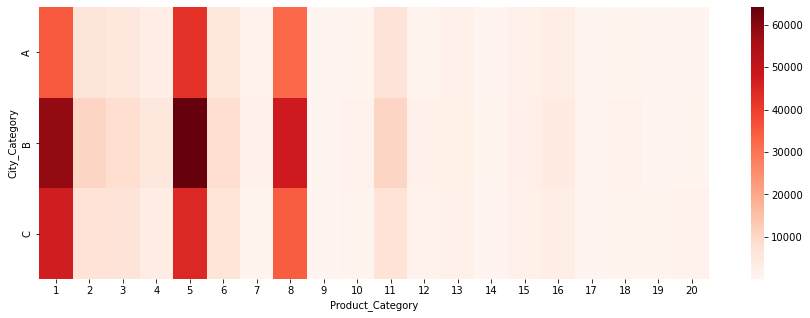

In [56]:
plt.figure(figsize=(15,5))
sns.heatmap(pd.crosstab(index=df['City_Category'],columns=df['Product_Category']),cmap='Reds')
plt.show()

In [57]:
pd.crosstab(index=df['City_Category'],columns=df['Product_Category'],normalize='index')

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
City_Category,,,,,,,,,,,,,,,,,,,,
A,0.238588,0.041765,0.033618,0.020743,0.287079,0.037453,0.008338,0.218851,0.000667,0.005121,0.044894,0.007230,0.010977,0.003271,0.011052,0.019369,0.000823,0.005121,0.001857,0.003183
B,0.253148,0.045386,0.037316,0.022710,0.278723,0.037051,0.006949,0.206650,0.000626,0.005067,0.045564,0.007279,0.009869,0.002746,0.010890,0.017548,0.001160,0.006036,0.002008,0.003272
C,0.276338,0.042757,0.039256,0.020424,0.261888,0.037788,0.005263,0.200851,0.000546,0.005469,0.042299,0.007102,0.009774,0.002408,0.010761,0.017281,0.001116,0.005774,0.005099,0.007807


#### Inference - We observe that irrespective of the city category, people mostly buy the products 1, 5 and 8.

### Question 11 - What product categories are mostly bought by each of the marital status categories?

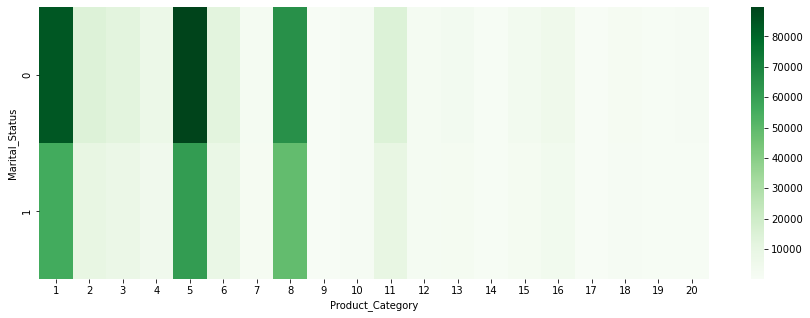

In [58]:
plt.figure(figsize=(15,5))
sns.heatmap(pd.crosstab(index=df['Marital_Status'],columns=df['Product_Category']),cmap='Greens')
plt.show()

In [59]:
pd.crosstab(index=df['Marital_Status'],columns=df['Product_Category'],normalize='index')

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Marital_Status,,,,,,,,,,,,,,,,,,,,
0,0.261027,0.043738,0.038235,0.022203,0.277365,0.037554,0.006311,0.202359,0.000603,0.004724,0.045378,0.006292,0.009782,0.002617,0.010633,0.017674,0.000922,0.005077,0.002927,0.004579
1,0.249847,0.043391,0.035039,0.020415,0.273376,0.037149,0.007499,0.216436,0.000625,0.005902,0.042913,0.008535,0.010649,0.003020,0.011269,0.018358,0.001249,0.006621,0.002931,0.004774


#### Inference - We observe that irrespective of the marital status, people mostly buy the products 1, 5 and 8.

### Question 12 - What product categories are mostly bought by each of the occupation categories?

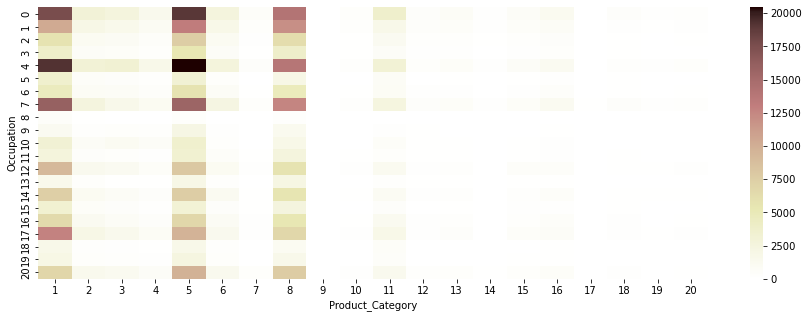

In [60]:
plt.figure(figsize=(15,5))
sns.heatmap(pd.crosstab(index=df['Occupation'],columns=df['Product_Category']),cmap='pink_r')
plt.show()

In [61]:
pd.crosstab(index=df['Occupation'],columns=df['Product_Category'],normalize='index')

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Occupation,,,,,,,,,,,,,,,,,,,,
0,0.254552,0.042865,0.038018,0.021368,0.273914,0.037051,0.008065,0.203246,0.000606,0.005107,0.054134,0.006420,0.010388,0.002828,0.009797,0.017674,0.000909,0.006146,0.002712,0.004199
1,0.218659,0.040743,0.033048,0.020626,0.279158,0.037457,0.007928,0.254335,0.000339,0.006275,0.035634,0.009200,0.011744,0.003582,0.010726,0.016619,0.001293,0.005045,0.002947,0.004642
2,0.217212,0.041990,0.036240,0.019368,0.287989,0.039304,0.008663,0.237034,0.000378,0.005599,0.043541,0.009192,0.009344,0.003064,0.010895,0.016947,0.000530,0.005712,0.002345,0.004653
3,0.224499,0.037910,0.034950,0.022655,0.300888,0.037056,0.007798,0.218750,0.000740,0.007001,0.039447,0.010189,0.012523,0.003871,0.009164,0.019467,0.000854,0.005749,0.002789,0.003700
4,0.267046,0.042185,0.045891,0.023640,0.283995,0.036882,0.006233,0.191977,0.000486,0.003526,0.044309,0.005164,0.008204,0.002499,0.009883,0.016546,0.000639,0.003720,0.002471,0.004706
5,0.300503,0.048545,0.036842,0.020770,0.270007,0.031237,0.003050,0.158988,0.000495,0.004286,0.065194,0.006429,0.007912,0.001896,0.011209,0.017555,0.000742,0.007830,0.001978,0.004533
6,0.227087,0.040521,0.037017,0.021963,0.280884,0.036277,0.007206,0.236168,0.000642,0.005182,0.042199,0.007946,0.010118,0.003554,0.009328,0.020532,0.000888,0.004491,0.003109,0.004886
7,0.272391,0.042650,0.027244,0.018667,0.265291,0.039117,0.005554,0.214352,0.000594,0.005146,0.040968,0.007898,0.010327,0.002718,0.010191,0.019839,0.001410,0.007830,0.003261,0.004552
8,0.332468,0.064286,0.043506,0.025325,0.240909,0.029221,0.003247,0.170779,0.000649,0.005195,0.040909,0.001948,0.005195,0.000000,0.014935,0.010390,0.000649,0.004545,0.003247,0.002597


#### Inference - We observe that irrespective of the occupation years, people mostly buy the products 1, 5 and 8.

### Question 13 - What product categories are mostly bought by each of the Current City Stay Years categories?

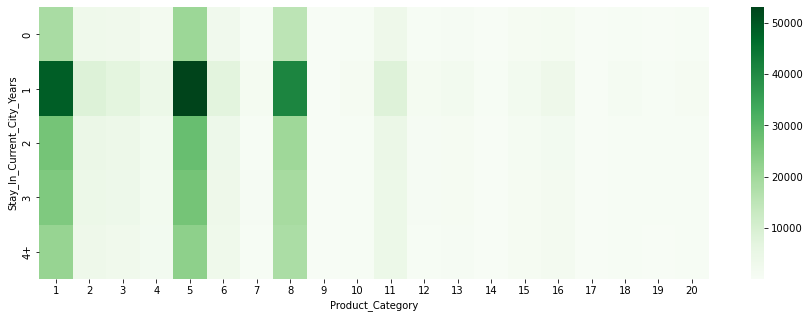

In [62]:
plt.figure(figsize=(15,5))
sns.heatmap(pd.crosstab(index=df['Stay_In_Current_City_Years'],columns=df['Product_Category']),cmap='Greens')
plt.show()

In [63]:
pd.crosstab(index=df['Stay_In_Current_City_Years'],columns=df['Product_Category'],normalize='index')

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Stay_In_Current_City_Years,,,,,,,,,,,,,,,,,,,,
0,0.250621,0.043222,0.037671,0.021436,0.278243,0.036969,0.007537,0.207210,0.000648,0.004822,0.047072,0.007267,0.010468,0.002917,0.011832,0.017829,0.001162,0.005754,0.002688,0.004633
1,0.253151,0.043449,0.036340,0.021255,0.275361,0.037678,0.006694,0.213405,0.000565,0.005263,0.042236,0.007301,0.010402,0.002982,0.010760,0.018305,0.000871,0.006264,0.003148,0.004568
2,0.261511,0.045471,0.038586,0.021049,0.277223,0.036820,0.005928,0.199617,0.000671,0.005346,0.045431,0.007230,0.009656,0.002456,0.010722,0.017794,0.001134,0.005188,0.002920,0.005247
3,0.263502,0.044618,0.037815,0.022172,0.278174,0.036296,0.007278,0.201194,0.000686,0.005200,0.042235,0.007162,0.009947,0.002489,0.010580,0.017130,0.001213,0.005158,0.002679,0.004472
4+,0.255094,0.040855,0.034617,0.021714,0.269835,0.039005,0.006890,0.214867,0.000534,0.005254,0.047995,0.006985,0.010033,0.002929,0.010934,0.018382,0.001115,0.005645,0.002929,0.004388


#### Inference - We observe that irrespective of the current years stay, people mostly buy the products 1, 5 and 8.

### Question 14 - Top 10 Product IDs and which product category they belong to?

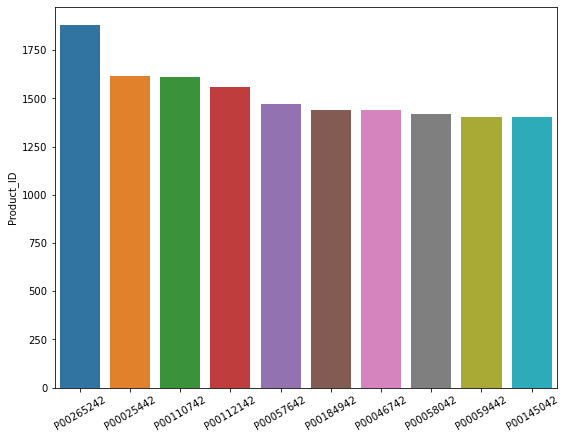

In [64]:
plt.figure(figsize=(9,7))
sns.barplot(y=df['Product_ID'].value_counts()[:10],x=df['Product_ID'].value_counts()[:10].index)
plt.xticks(rotation=30)
plt.show()

In [65]:
df.loc[df['Product_ID'].isin(df['Product_ID'].value_counts()[:10].index),'Product_Category'].unique()

array([1, 5, 6, 8], dtype=int64)

#### Inference - The top 10 product IDs belong to the product categories 1,5,6 and 8.

## Confidence Interval Using The Central Limit Theorem For The Entire Population
- Let’s assume that the population mean and standard deviation are finite.
- Let us draw 1 lakh samples from the given dataset, with each sample having 10000 data
points

In [ ]:
data=df['Purchase']
sampling_distribution=[]
for i in range(100000):
sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

In [ ]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm if it is␣
,→so.
#We can confirm using QQ Plot.

In [ ]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [69]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [70]:
#68% Confidence Interval :
print('Population Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Population Mean Purchase 68% Confidence Interval : 9146.522418690758 to 9245.009750147245


In [71]:
#95% Confidence Interval :
print('Population Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Population Mean Purchase 95% Confidence Interval : 9097.278752962513 to 9294.25341587549


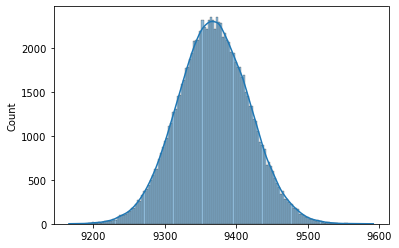

In [73]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

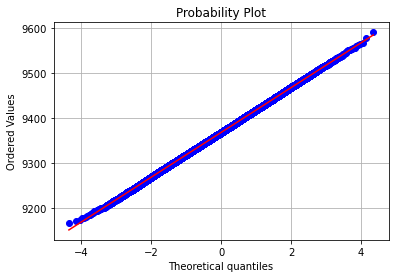

In [74]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [75]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [76]:
#68% Confidence Interval :
print('Male Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Male Mean Purchase 68% Confidence Interval : 9317.892020424133 to 9417.956468955868


In [77]:
#95% Confidence Interval :
print('Male Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Male Mean Purchase 95% Confidence Interval : 9267.859796158267 to 9467.988693221734


## Confidence Interval Using The Central Limit Theorem For Females

In [78]:
data=df.loc[df['Gender']=='F','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

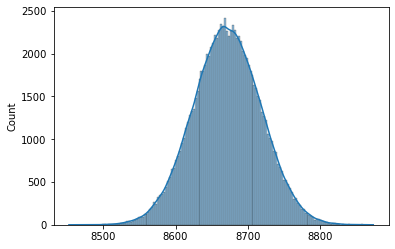

In [79]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

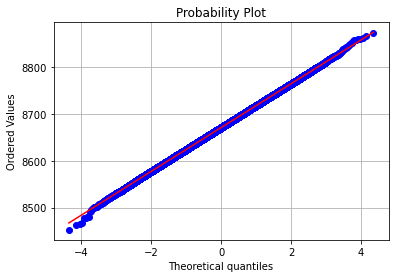

In [80]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [81]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [82]:
#68% Confidence Interval :
print('Female Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Female Mean Purchase 68% Confidence Interval : 8624.236932917702 to 8718.085025300297


In [83]:
#95% Confidence Interval :
print('Female Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Female Mean Purchase 95% Confidence Interval : 8577.312886726402 to 8765.009071491597


## Confidence Interval Using The Central Limit Theorem For City A

In [84]:
data=df.loc[df['City_Category']=='A','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

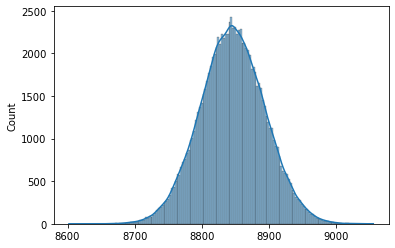

In [85]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

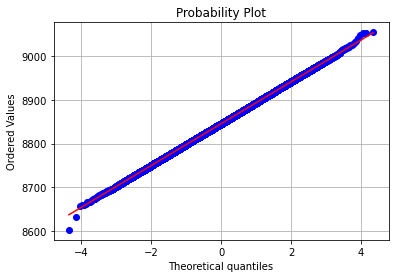

In [86]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [87]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [88]:
#68% Confidence Interval :
print('City A Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

City A Mean Purchase 68% Confidence Interval : 8797.471169466544 to 8893.498509299456


In [89]:
#95% Confidence Interval :
print('City A Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

City A Mean Purchase 95% Confidence Interval : 8749.457499550088 to 8941.512179215912


## Confidence Interval Using The Central Limit Theorem For City B

In [90]:
data=df.loc[df['City_Category']=='B','Purchase']
data
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

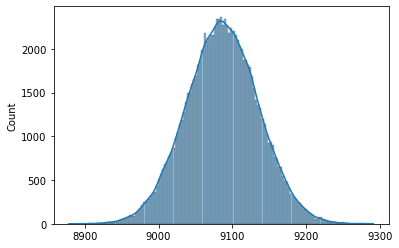

In [91]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

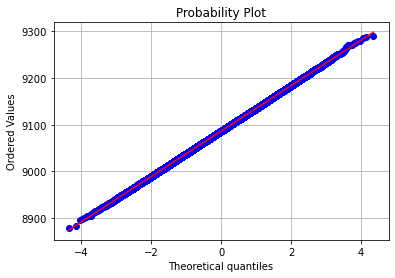

In [92]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [93]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [94]:
#68% Confidence Interval :
print('City B Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

City B Mean Purchase 68% Confidence Interval : 9037.7509426006 to 9135.225770363399


In [95]:
#95% Confidence Interval :
print('City B Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

City B Mean Purchase 95% Confidence Interval : 8989.0135287192 to 9183.963184244798


## Confidence Interval Using The Central Limit Theorem For City C

In [96]:
data=df.loc[df['City_Category']=='C','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

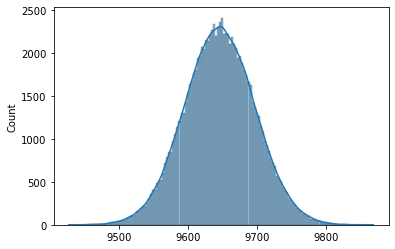

In [97]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

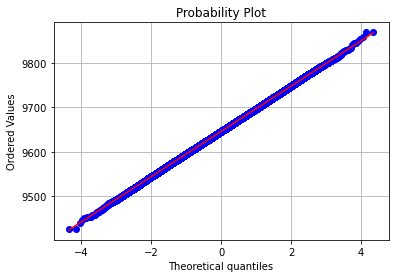

In [98]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [99]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [100]:
#68% Confidence Interval :
print('City C Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

City C Mean Purchase 68% Confidence Interval : 9594.768033726903 to 9696.675063373097


In [101]:
#95% Confidence Interval :
print('City C Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

City C Mean Purchase 95% Confidence Interval : 9543.814518903804 to 9747.628578196196


## Confidence Interval Using The Central Limit Theorem For Age Group 0-17

In [102]:
print(df['Age'].nunique())
# There are 7 unique age categories.
print(df['Age'].unique().tolist())

7
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']


In [103]:
data=df.loc[df['Age']=='0-17','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

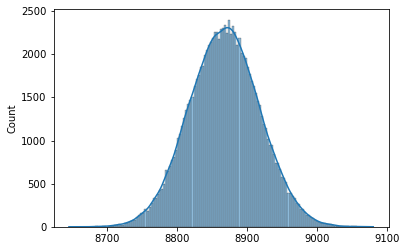

In [104]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

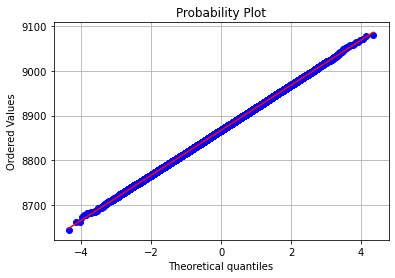

In [105]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [106]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [107]:
#68% Confidence Interval :
print('Age Group 0-17 Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Age Group 0-17 Mean Purchase 68% Confidence Interval : 8817.16969308802 to 8917.755087865979


In [108]:
#95% Confidence Interval :
print('Age Group 0-17 Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Age Group 0-17 Mean Purchase 95% Confidence Interval : 8766.876995699042 to 8968.047785254957


## Confidence Interval Using The Central Limit Theorem For Age Group 18-25

In [109]:
data=df.loc[df['Age']=='18-25','Purchase']
data
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

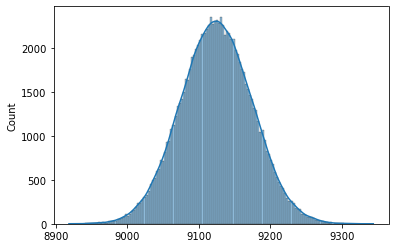

In [110]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

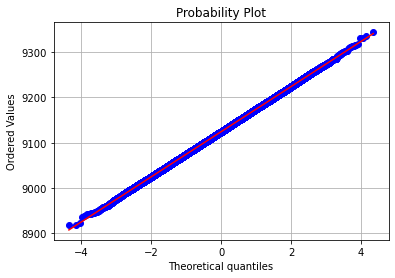

In [111]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [112]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [113]:
#68% Confidence Interval :
print('Age Group 18-25 Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Age Group 18-25 Mean Purchase 68% Confidence Interval : 9074.407415798321 to 9174.163115891677


In [114]:
#95% Confidence Interval :
print('Age Group 18-25 Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Age Group 18-25 Mean Purchase 95% Confidence Interval : 9024.529565751642 to 9224.040965938357


## Confidence Interval Using The Central Limit Theorem For Age Group 26-35

In [115]:
data=df.loc[df['Age']=='26-35','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

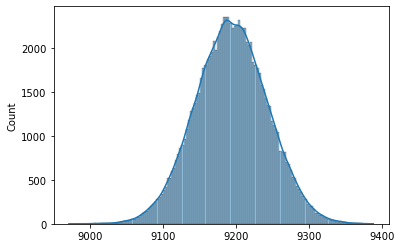

In [116]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

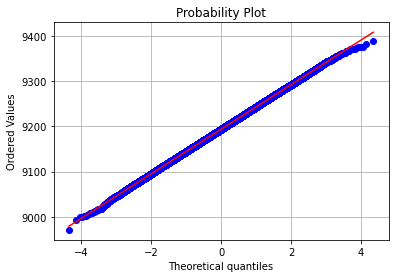

In [117]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [118]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [119]:
#68% Confidence Interval :
print('Age Group 26-35 Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Age Group 26-35 Mean Purchase 68% Confidence Interval : 9144.238069132618 to 9242.814961225387


In [120]:
#95% Confidence Interval :
print('Age Group 26-35 Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Age Group 26-35 Mean Purchase 95% Confidence Interval : 9094.949623086235 to 9292.10340727177


## Confidence Interval Using The Central Limit Theorem For The Age Group 36-45

In [121]:
data=df.loc[df['Age']=='36-45','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

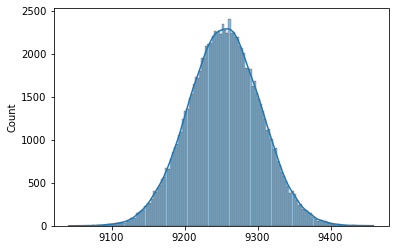

In [122]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

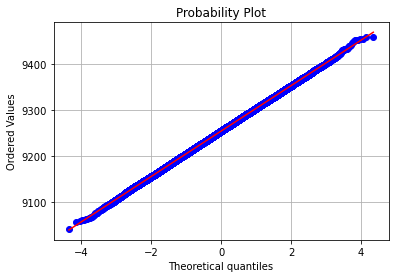

In [123]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [124]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [125]:
#68% Confidence Interval :
print('Age Group 36-45 Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Age Group 36-45 Mean Purchase 68% Confidence Interval : 9204.905608025932 to 9303.751895302066


In [126]:
#95% Confidence Interval :
print('Age Group 36-45 Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Age Group 36-45 Mean Purchase 95% Confidence Interval : 9155.482464387866 to 9353.175038940133


## Confidence Interval Using The Central Limit Theorem For Age Group 46-50

In [127]:
data=df.loc[df['Age']=='46-50','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

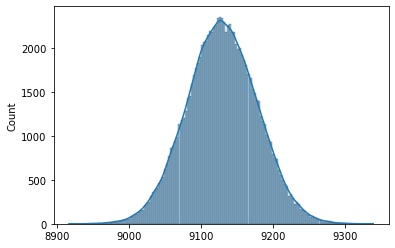

In [128]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

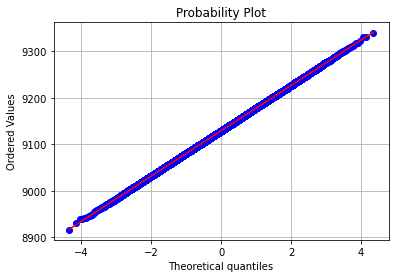

In [129]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [130]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [131]:
#68% Confidence Interval :
print('Age Group 46-50 Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Age Group 46-50 Mean Purchase 68% Confidence Interval : 9080.259436324037 to 9177.665785283962


In [132]:
#95% Confidence Interval :
print('Age Group 46-50 Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Age Group 46-50 Mean Purchase 95% Confidence Interval : 9031.556261844073 to 9226.368959763926


## Confidence Interval Using The Central Limit Theorem For Age Group 51-55

In [133]:
data=df.loc[df['Age']=='51-55','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

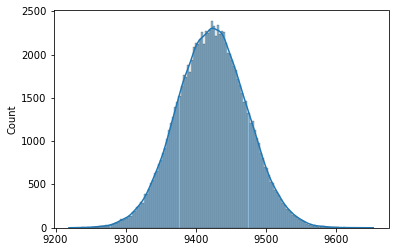

In [134]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

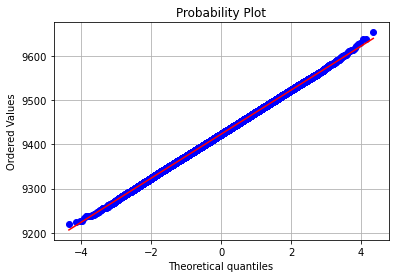

In [135]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [136]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [137]:
#68% Confidence Interval :
print('Age Group 51-55 Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Age Group 51-55 Mean Purchase 68% Confidence Interval : 9373.080889980605 to 9472.571365837395


In [138]:
#95% Confidence Interval :
print('Age Group 51-55 Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Age Group 51-55 Mean Purchase 95% Confidence Interval : 9323.33565205221 to 9522.31660376579


## Confidence Interval Using The Central Limit Theorem For Age Group 55+

In [139]:
data=df.loc[df['Age']=='55+','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

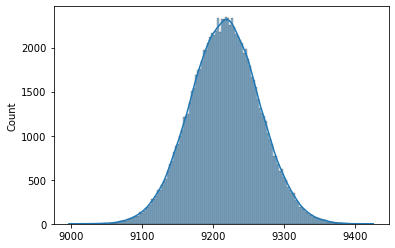

In [140]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

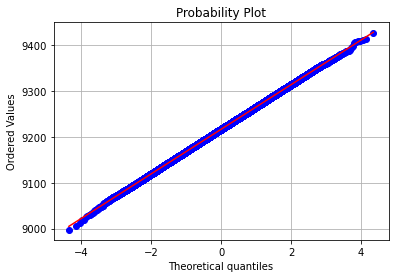

In [141]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [142]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [143]:
#68% Confidence Interval :
print('Age Group 55+ Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Age Group 55+ Mean Purchase 68% Confidence Interval : 9167.893286845856 to 9265.333105306143


In [144]:
#95% Confidence Interval :
print('Age Group 55+ Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Age Group 55+ Mean Purchase 95% Confidence Interval : 9119.173377615713 to 9314.053014536286


## Confidence Interval Using The Central Limit Theorem For Stay In Current City 0 Year

In [145]:
print(df['Stay_In_Current_City_Years'].nunique())
# There are 5 unique Stay In Cuurent City Years.
print(df['Stay_In_Current_City_Years'].unique().tolist())

5
['2', '4+', '3', '1', '0']


In [146]:
data=df.loc[df['Stay_In_Current_City_Years']=='0','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

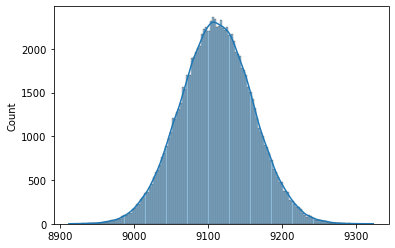

In [147]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

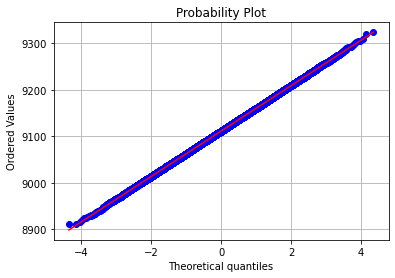

In [148]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [149]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [150]:
#68% Confidence Interval :
print('Current City Stay 0 Year Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Current City Stay 0 Year Mean Purchase 68% Confidence Interval : 9062.30545395957 to 9160.26637463843


In [151]:
#95% Confidence Interval :
print('Current City Stay 0 Year Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Current City Stay 0 Year Mean Purchase 95% Confidence Interval : 9013.324993620141 to 9209.24683497786


## Confidence Interval Using The Central Limit Theorem For Stay In Current City 1 Year

In [152]:
data=df.loc[df['Stay_In_Current_City_Years']=='1','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

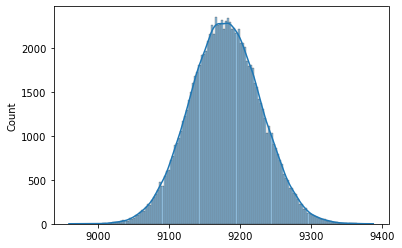

In [153]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

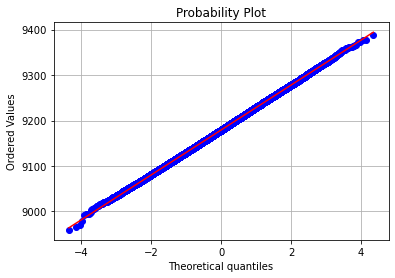

In [154]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [155]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [156]:
#68% Confidence Interval :
print('Current City Stay 1 Year Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Current City Stay 1 Year Mean Purchase 68% Confidence Interval : 9129.580985775216 to 9228.605304208782


In [157]:
#95% Confidence Interval :
print('Current City Stay 1 Year Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Current City Stay 1 Year Mean Purchase 95% Confidence Interval : 9080.068826558432 to 9278.117463425566


## Confidence Interval Using The Central Limit Theorem For Stay In Current City 2 Years

In [158]:
data=df.loc[df['Stay_In_Current_City_Years']=='2','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

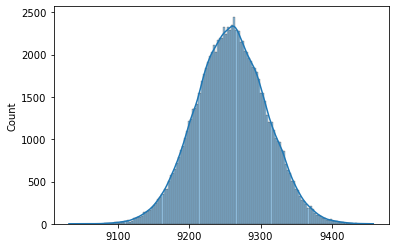

In [159]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

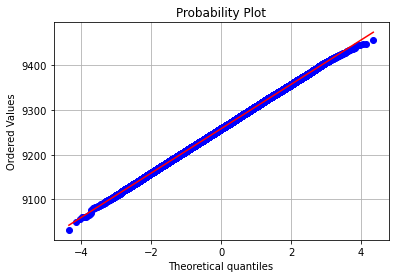

In [160]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [161]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [162]:
#68% Confidence Interval :
print('Current City Stay 2 Years Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Current City Stay 2 Years Mean Purchase 68% Confidence Interval : 9208.49904511685 to 9307.956619385148


In [163]:
#95% Confidence Interval :
print('Current City Stay 2 Years Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Current City Stay 2 Years Mean Purchase 95% Confidence Interval : 9158.770257982702 to 9357.685406519297


## Confidence Interval Using The Central Limit Theorem For Stay In Current City 3 Years

In [164]:
data=df.loc[df['Stay_In_Current_City_Years']=='3','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

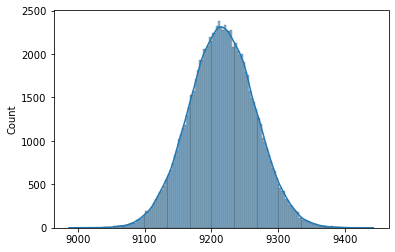

In [165]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

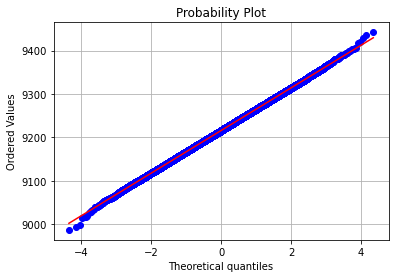

In [166]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [167]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [168]:
#68% Confidence Interval :
print('Current City Stay 3 Years Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Current City Stay 3 Years Mean Purchase 68% Confidence Interval : 9166.689156775368 to 9265.08956621463


In [169]:
#95% Confidence Interval :
print('Current City Stay 3 Years Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Current City Stay 3 Years Mean Purchase 95% Confidence Interval : 9117.488952055739 to 9314.28977093426


## Confidence Interval Using The Central Limit Theorem For Stay In Current City 4+ Years

In [170]:
data=df.loc[df['Stay_In_Current_City_Years']=='4+','Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

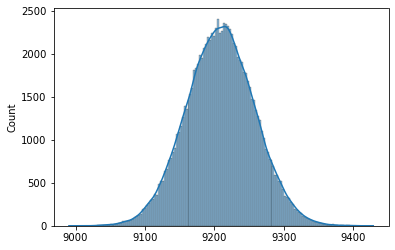

In [171]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

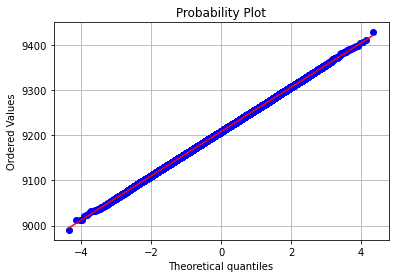

In [172]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [173]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [174]:
#68% Confidence Interval :
print('Current City Stay 4+ Years Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Current City Stay 4+ Years Mean Purchase 68% Confidence Interval : 9159.369842172933 to 9257.65787423307


In [175]:
#95% Confidence Interval :
print('Current City Stay 4+ Years Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Current City Stay 4+ Years Mean Purchase 95% Confidence Interval : 9110.225826142865 to 9306.801890263137


## Confidence Interval Using The Central Limit Theorem For Married People

In [176]:
print(df['Marital_Status'].nunique())
# There are 2 unique Marital Status categories.
print(df['Marital_Status'].unique().tolist())

2
[0, 1]


In [177]:
data=df.loc[df['Marital_Status']==1,'Purchase']
sampling_distribution=[]
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(data, size=10000)))

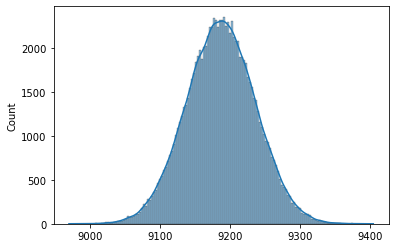

In [178]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

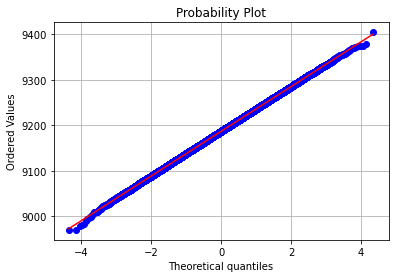

In [179]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [180]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [181]:
#68% Confidence Interval :
print('Married Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Married Mean Purchase 68% Confidence Interval : 9137.843988230801 to 9236.235351369203


In [182]:
#95% Confidence Interval :
print('Married Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Married Mean Purchase 95% Confidence Interval : 9088.6483066616 to 9285.431032938404


## Confidence Interval Using The Central Limit Theorem For Unmarried People

In [183]:
Unmarried_data=df.loc[df['Marital_Status']==0,'Purchase']
Unmarried_data
sampling_distribution=[] 
for i in range(100000):
    sampling_distribution.append(np.mean(np.random.choice(Unmarried_data, size=10000)))

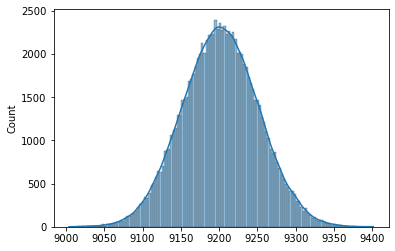

In [184]:
#Plotting the sampling distribution
sns.histplot(data=sampling_distribution,kde=True)
plt.show()
#It looks like this is a normal distribution. But we need to confirm it is so. 
#We can confirm using QQ Plot.

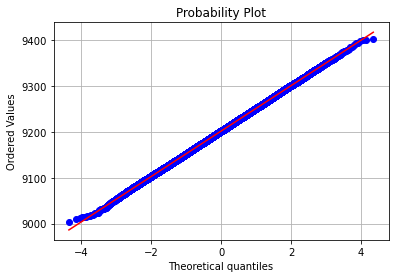

In [185]:
#QQ Plot
fig, ax1 = plt.subplots()
plt.grid()
prob = stats.probplot(sampling_distribution, dist=stats.norm, plot=ax1)

From the above QQ PLot, we can confirm that the sampling distribution follows a normal distribution, since almost all the points are lying on the 45 degree line.

In [186]:
mean_sampling_distribution = np.mean(sampling_distribution)
std_sampling_distribution=np.std(sampling_distribution)

In [187]:
#68% Confidence Interval :
print('Unmarried Mean Purchase 68% Confidence Interval :',mean_sampling_distribution-std_sampling_distribution,
      'to',mean_sampling_distribution+std_sampling_distribution)

Unmarried Mean Purchase 68% Confidence Interval : 9152.00225431859 to 9251.066608847408


In [188]:
#95% Confidence Interval :
print('Unmarried Mean Purchase 95% Confidence Interval :',mean_sampling_distribution-2*std_sampling_distribution,
      'to',mean_sampling_distribution+2*std_sampling_distribution)

Unmarried Mean Purchase 95% Confidence Interval : 9102.47007705418 to 9300.598786111817


# Recommendations

#### 1) 
#### From the analysis done in this notebook, we observe that not only the most sold product categories are 5,1 and 8, but also irrespective of the gender, age category, city category, marital status, occupation years and current city stay years, people mostly buy the product categories 1, 5 and 8. Therefore Walmart should always try to keep abundant stock of these 3 product categories at all times.

#### 2) 
#### The top 10 product IDs belong to the product categories 1,5,6 and 8, which indicate that these product IDs are the favourites from their product categories. Therefore Walmart should always try to keep abundant stock of these product IDs from their categories at all times.

#### 3) 
The Male Mean Purchase 95% Confidence Interval is from 9267.859796158267 to 9467.988693221734 and the Female Mean Purchase 95% Confidence Interval is from 8577.312886726402 to 8765.009071491597. 
#### We see that the 95% confidence interval for the average amount spent by males is greater than females, and there is a clear distinction between the two. Therefore, we can expect that men will buy more on average than women. Also, the no of males making a purchase are 3 times of females making a purchase and the average spend by males is more than females, therefore Walmart should try to keep abundant stock of products which men usually buy and prefer.

#### 4)
- Age Group 0-17 Mean Purchase 95% Confidence Interval : 8766.876995699042 to 8968.047785254957
- Age Group 18-25 Mean Purchase 95% Confidence Interval : 9024.529565751642 to 9224.040965938357
- Age Group 26-35 Mean Purchase 95% Confidence Interval : 9094.949623086235 to 9292.10340727177
- Age Group 36-45 Mean Purchase 95% Confidence Interval : 9155.482464387866 to 9353.175038940133
- Age Group 46-50 Mean Purchase 95% Confidence Interval : 9031.556261844073 to 9226.368959763926
- Age Group 51-55 Mean Purchase 95% Confidence Interval : 9323.33565205221 to 9522.31660376579
- Age Group 55+ Mean Purchase 95% Confidence Interval : 9119.173377615713 to 9314.053014536286
#### We see that the 95% confidence interval for mean purchase price for the age categories 51-55 are greater than all other categories, and the age category 0-17 has the lowest 95% mean purchase price confidence interval. We can therefore assume that people who are 51-55 years old have their mean purchase price on the higher side and their confidence interval can be easily distinguished from the other age categories. People who are 0-17 years old have the lowest average purchase price, and their confidence interval can also be easily distinguished from the other age categories. Since most of the customers are in the age category 18-25, 36-45 and 26-35, therefore Walmart should try to keep abundant stock of products which they usually buy and prefer.

#### 5)
- Married Mean Purchase 95% Confidence Interval : 9088.6483066616 to 9285.431032938404
- Unmarried Mean Purchase 95% Confidence Interval : 9102.47007705418 to 9300.598786111817
#### We see that the 95% confidence intervals for the mean purchase price for both married and unmarried are kind of similar, so we cannot find a distinction between their mean purchase prices. However, since the the number of unmarried people buying the products is almost 1.5x of that of who are married, therfore Walmart should try to keep abundant stock of products which unmarried people usually buy and prefer.

#### 6)
- Current City Stay 0 Year Mean Purchase 95% Confidence Interval : 9013.324993620141 to 9209.24683497786
- Current City Stay 1 Year Mean Purchase 95% Confidence Interval : 9080.068826558432 to 9278.117463425566
- Current City Stay 2 Years Mean Purchase 95% Confidence Interval : 9158.770257982702 to 9357.685406519297
- Current City Stay 3 Years Mean Purchase 95% Confidence Interval : 9117.488952055739 to 9314.28977093426
- Current City Stay 4+ Years Mean Purchase 95% Confidence Interval : 9110.225826142865 to 9306.801890263137
#### We observe that the 95% confidence intervals of average purchase price for different current city staying years are overlapping and therefore we cannot conclude that there is a distinction among all the categories. However, the number of people who make the most purchases are those that have lived in the current city for 1 year, and thus Walmart can keep this factor in account and stock its inverntory accordingly.

#### 7)
- City A Mean Purchase 95% Confidence Interval : 8749.457499550088 to 8941.512179215912
- City B Mean Purchase 95% Confidence Interval : 8989.0135287192 to 9183.963184244798
- City C Mean Purchase 95% Confidence Interval : 9543.814518903804 to 9747.628578196196
####  We observe that the 95% confidence interval for the mean purchase price for city C is greater than city B which is in turn greater than city A. There is a clear distinction between their average purchase prices, therefore we can conclude that city C on average makes higher purchases than city B which in turn is higher than city A. Also, we observe that the number of people buying from City B is the highest, followed by C and A. Therfore Walmart should try to keep abundant stock of products firstly in city B, then C and then A.


#### 8) 
#### We see that the highest average purchase price is for 17 years of occupation, which might be because people having more occupation years might be earning more. Therfore, Walmart can expect that people having higher occupation years might have higher purchase price on average. Also, people having 0,4 and 7 years of occupation are the most frequent buyers. Therefore Walmart should try to keep abundant stock of products which these people usually buy and prefer.